### Турнир по игре «Герои меча и магии»
#### Описание игры
        Два Героя решили наконец выяснить, кто из них умнее. В составе армии у каждого из Героев есть очень много Чудищ, Рыцарей, Гидр, Циклопов, Титанов и Драконов. В качестве места схватки были выбраны две скалы на границе их владений, разделенные глубокой пропастью. Над пропастью было натянуто 1000 тонких навесных мостов, соединяющих две скалы. Мосты настолько тонки, что с каждой стороны на мост может вступить только одно существо. Скинувшись по 10000 золотых монет перед схваткой, Герои положили на середину каждого моста по 20 монет. В день битвы в предрассветном тумане с каждой из скал к мостам спустилось по одному Герою вместе с армией.
        Оба героя должны выбрать 1000 существ из своей армии для схватки (на каждый мост в итоге попадет по одному существу с каждой стороны). После того как выбор сделан, нейтральный Троглодит, приглашенный в качестве арбитра, слепым жребием составляет пары для схваток, выбирая по одному из 1000 существ с каждой стороны на каждый мост. Затем начинается схватка. Задача каждого существа — унести как можно больше золота своему герою со своего моста. В ходе битвы часть клада может упасть в пропасть. Разные существа имеют разные шансы на успех против разных соперников. В таблице ниже приведено количество монет, которое сможет забрать каждое существо в зависимости от того, кто является его соперником.


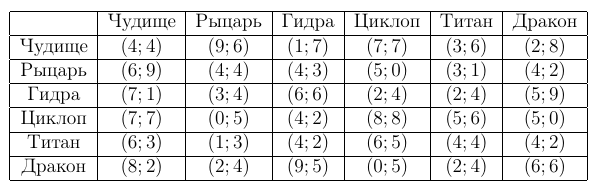

        Например, если Гидра выходит сражаться против Чудища, то 12 монет упадет в пропасть, 7 монет заберет своему Герою Гидра и лишь 1 монету сможет унести потрепанное Чудище. Все сражения проходят одновременно. Задача каждого Героя — забрать максимальное число монет. Для этого ему нужно правильно определить 1000 участников битвы с его стороны.

#### Общие положения турнира
1. В турнире участвуют все желающие слушатели курса.
2. Каждый желающий студент заявляет на турнир одну стратегию в игре «Герои
меча и магии».
3. Крайний срок подачи стратегии на турнир – четверг, 14 мая 2022 года, 23:59:00.
4. Стратегия заявляется на турнир исключительно путем заполнения анкеты по
этой ссылке.
5. Все поданные на турнир стратегии сыграют друг с другом в круговом турнире,
то есть каждая стратегия сыграет с каждой по одному разу.
6. Победитель турнира определяется по сумме заработанных денег во всех играх.
7. Авторы лучших 10% стратегий по итогам турнира получат бонусы к итоговому
баллу по курсу «Теория игр».

In [1]:
from itertools import chain, permutations
import json
from statistics import mean

import numpy as np
import pandas as pd
import random
from tqdm import tqdm

In [2]:
# домножить на 100

def get_combination(Kk=5, n=10):
    
    list_of_a = []
    a = [0] * Kk

    def Out():
        list_of_a.append(a.copy())

    def rec(k, n, v):
#         if n < k:
#             return # Кубиков не хватит
        if k == 1:
            if n > v:
                return # Очень высокая башня - не дают
            a[0] = n
            Out()
            return

        a[k - 1] = n if n < v else v
        while a[k - 1] >= 0:
            rec(k - 1, n - a[k - 1], a[k - 1])
            a[k - 1] -= 1

    if n < Kk:
        print('error')
    rec(Kk, n, n)
    return list_of_a

In [3]:
def find_gains(hero1, hero2, M_coins, heroes):
    coins1, coins2 = M_coins[heroes[hero1]][heroes[hero2]].split(';')
    return int(coins1), int(coins2)

In [4]:
def calc_stat(nn):
    heroes = {'Чудище':0, 'Рыцарь':1, 'Гидра':2, 'Циклоп':3, 'Титан':4, 'Дракон':5}
    a = """Чудище (4;4) (9;6) (1;7) (7;7) (3;6) (2; 8)
    Рыцарь (6; 9) (4; 4) (4; 3) (5; 0) (3; 1) (4; 2)
    Гидра (7; 1) (3; 4) (6; 6) (2; 4) (2; 4) (5; 9)
    Циклоп (7; 7) (0; 5) (4; 2) (8; 8) (5; 6) (5; 0)
    Титан (6; 3) (1; 3) (4; 2) (6; 5) (4; 4) (4; 2)
    Дракон (8; 2) (2; 4) (9; 5) (0; 5) (2; 4) (6; 6)"""

    a = a.replace('; ', ';').replace('(', '').replace(')', '')
    a = a.split('\n')

    a = [t.split()[1:] for t in a]

    random.seed(nn)

    Kk = 5
    n = 10
    dict_sums = {}

    combs = get_combination(Kk=5, n=10)

    for comb1 in tqdm(combs):
        for per1 in list(set(permutations(comb1, 5))):

            count_heroes1 = [p * 100 for p in per1]
            count_heroes1.insert(2, 0)
            count_heroes1 = tuple(count_heroes1)

            for comb2 in combs:
                for per2 in list(set(permutations(comb2, 5))):

                    count_heroes2 = [p * 100 for p in per2]
                    count_heroes2.insert(2, 0)
                    count_heroes2 = tuple(count_heroes2)

                    list_heroes1 = [[list(heroes.keys())[i]] * count_heroes1[i] for i in range(6)]
                    list_heroes1 = list(chain(*list_heroes1))
                    random.shuffle(list_heroes1)


                    list_heroes2 = [[list(heroes.keys())[i]] * count_heroes2[i] for i in range(6)]
                    list_heroes2 = list(chain(*list_heroes2))
                    random.shuffle(list_heroes2)

                    sum_gamer1 = 0
                    sum_gamer2 = 0

                    for hero1, hero2 in zip(list_heroes1, list_heroes2):
                        sum_tmp1, sum_tmp2 = find_gains(hero1, hero2, a, heroes)
                        sum_gamer1 += sum_tmp1
                        sum_gamer2 += sum_tmp2

                    dict_sums[(count_heroes1, count_heroes2)] = [sum_gamer1, sum_gamer2]


    dict_sums_mean_min = {}

    for key, val in dict_sums.items():
        key1, key2 = key
        val1, val2 = val
        if key1 not in dict_sums_mean_min.keys():
            dict_sums_mean_min[key1] = [val1]
        else:
            dict_sums_mean_min[key1] += [val1]
        if key2 not in dict_sums_mean_min.keys():
            dict_sums_mean_min[key2] = [val2]
        else:
            dict_sums_mean_min[key2] += [val2]

    from statistics import mean

    dict_sums_mean = {}
    dict_sums_min = {}

    for key, val in dict_sums_mean_min.items():
        dict_sums_mean[key] = mean(val)
        dict_sums_min[key] = min(val)


    maxmean = 0
    best_com_mean = ''

    for key, val in dict_sums_mean.items():
        if val > maxmean:
            maxmean = val
            best_com_mean = key

    print(maxmean)
    print(best_com_mean)

    maxmin = 0
    best_com_min = ''

    for key, val in dict_sums_min.items():
        if val > maxmin:
            maxmin = val
            best_com_min = key


    print(maxmin)
    print(best_com_min)

    minmax = 0
    meanmax = 0
    best_com_min_contr = ''
    best_com_mean_contr = ''

    for key, val in dict_sums.items():
        key1, key2 = key
        val1, val2 = val
        if best_com_min in key:
            if best_com_min == key1 and val2 > minmax:
                minmax = val2
                best_com_min_contr = key2
            elif best_com_min == key2 and val1 > minmax:
                minmax = val1
                best_com_min_contr = key1

        if best_com_mean in key:
            if best_com_mean == key1 and val2 > meanmax:
                meanmax = val2
                best_com_mean_contr = key2
            elif best_com_mean == key2 and val1 > meanmax:
                meanmax = val1
                best_com_mean_contr = key1

    print('meanmax')
    print(meanmax)
    print(best_com_mean_contr)

    print('minmax')
    print(minmax)
    print(best_com_min_contr)

    dict_sums_str = {str(key):val for key, val in dict_sums.items()}


    with open(f'dict_sums_{nn}.json', 'w') as fd:
        json.dump(dict_sums_str, fd)
        
    return minmax, best_com_min_contr, maxmin, best_com_min, best_com_mean, maxmean, best_com_mean_contr, meanmax

In [6]:
for nn in range(0, 1000):
    with open('stat.csv', 'a') as f:
        print(*calc_stat(nn), sep='|', file=f)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [27:30<00:00, 55.01s/it]


5001.623376623376
(400, 0, 0, 600, 0, 0)
3683
(400, 0, 0, 500, 0, 100)
meanmax
7600
(0, 0, 0, 1000, 0, 0)
minmax
7300
(0, 0, 0, 1000, 0, 0)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [28:30<00:00, 57.03s/it]


5002.534965034965
(300, 0, 0, 700, 0, 0)
3717
(400, 0, 0, 500, 0, 100)
meanmax
7700
(0, 0, 0, 1000, 0, 0)
minmax
7300
(0, 0, 0, 1000, 0, 0)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [33:35<00:00, 67.20s/it]


5000.896103896104
(900, 0, 0, 100, 0, 0)
3696
(400, 100, 0, 500, 0, 0)
meanmax
7207
(0, 0, 0, 200, 0, 800)
minmax
6800
(0, 0, 0, 1000, 0, 0)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [29:35<00:00, 59.18s/it]


5001.826673326674
(800, 0, 0, 200, 0, 0)
3668
(400, 0, 0, 500, 0, 100)
meanmax
7200
(0, 0, 0, 1000, 0, 0)
minmax
7300
(0, 0, 0, 1000, 0, 0)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [28:32<00:00, 57.09s/it]


5001.404595404595
(100, 0, 0, 900, 0, 0)
3702
(400, 0, 0, 500, 0, 100)
meanmax
7900
(0, 0, 0, 1000, 0, 0)
minmax
7300
(0, 0, 0, 1000, 0, 0)


In [7]:
heroes = {'Чудище':0, 'Рыцарь':1, 'Гидра':2, 'Циклоп':3, 'Титан':4, 'Дракон':5}

In [8]:
revert_heroes = {v:k for k, v in heroes.items()}

In [9]:
# read file

df = pd.read_csv('stat.csv', sep='|', header=None)
df.columns = ['minmax', 'best_com_min_contr', 'maxmin', 'best_com_min', 'best_com_mean', 'maxmean', 
              'best_com_mean_contr', 'meanmax']

In [10]:
for col in df.columns:
    if 'best' in col:
        df_tmp = df[col].str.replace('[(|)]', '', regex=True
                                    ).str.split(',', expand=True
                                               ).rename(columns={i:f'{col}_{revert_heroes[i]}' 
                                                                 for i in range(6)})
        df.drop(col, axis=1, inplace=True)
        df = pd.concat([df, df_tmp], axis=1)

        
for col in df.columns:
    df[col] = df[col].astype(int)

In [11]:
df.loc[len(df.index), :] = df.T.apply(mean, axis=1)
df.loc[len(df.index), :] = df.T.apply(min, axis=1)
df.loc[len(df.index), :] = df.T.apply(max, axis=1)

In [12]:
df.index = list(range(160)) + ['mean', 'min', 'max']

In [13]:
df.iloc[160:, 10:16].T

,mean,min,max
best_com_min_Чудище,367.500,300.0,400.0
best_com_min_Рыцарь,138.125,0.0,300.0
best_com_min_Гидра,0.000,0.0,0.0
best_com_min_Циклоп,430.625,400.0,500.0
best_com_min_Титан,10.625,0.0,100.0
best_com_min_Дракон,53.125,0.0,100.0


#### Результат - 1 место среди 7 стратегий

Итоговая стратегия:

|Чудище|Рыцарь|Гидра|Циклоп|Титан|Дракон|
| :-: | :-: | :-: | :-: | :-: | :-: |
|350	|130	|30	|430	|10	|50|

Прочие стратегии

|Чудище|Рыцарь|Гидра|Циклоп|Титан|Дракон|
| :-: | :-: | :-: | :-: | :-: | :-: |
|0	|0	|0	|1000	|0	|0|
|333	|334	|0	|0	|333	|0|
|0	|500	|0	|0	|0	|500|
|0	|14	|0	|986	|0	|0|
|51	|224	|149	|176	|224	|176|
|50	|200	|50	|400	|50	|250|